STUDENT PERFORMANCE INDICATOR

Life cycle of Machine Learning Project

1.Understanding the Problem Statement
2.Data Collection
3.Data Checks to perform
4.Exploratory data analysis
5.Data Pre-processing
6.Model Training
7.Choose best model

1. Understanding the problem Statement
    - This project understands how the student's performance(test scores) is affected by other variables such as Gender. Ethnicity, Parental level of Education, Lunch and test Preparation course.


2. Data Collection

In [64]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV 
from xgboost import XGBRegressor

In [65]:
#Load Data
df = pd.read_csv("student performance indicator.txt")
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [66]:
# Size of Data
df.shape

(1000, 8)

3. Data Checks to perform 

    - Check Missing Values
    - Check Duplicates
    - Check data types
    - Check the number of unique vales of each column
    - Check ststistics of data set
    - Check various categories present in the different categorical column

In [67]:
'''3.1 Check Missing values'''

df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [68]:
'''3.2 Check Duplicates'''

df.duplicated().sum()

0

In [69]:
'''3.3 Check data type'''

df.dtypes


gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [70]:
'''3.4 Check the number of unique values of each column'''

df.nunique()


gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [71]:
'''3.5 Check statistics of data'''

df.describe()


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [72]:
'''Check various categories present in the different categorical column'''


print("Categories in 'gender' variable :   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable :   ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'lunch' variable :   ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparartion_course' variable :   ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable :    ['female' 'male']
Categories in 'race_ethnicity' variable :    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'lunch' variable :    ['standard' 'free/reduced']
Categories in 'test_preparartion_course' variable :    ['none' 'completed']


In [73]:
'''Adding new Column 'Total_score' & Average  '''

df['Total_score'] = df['reading_score']+df['math_score']+df['writing_score']
df['Average'] = df['Total_score']/3

In [74]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [75]:
'''Score Analysis'''

reading_full = df[df['reading_score'] == 100]['Average'].count()
math_full = df[df['math_score'] == 100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()

print(f'Number of students with full mark in reading : {reading_full}')
print(f'Number of students with full mark in math : {math_full}')
print(f'Number of students with full mark in writhing : {writing_full}')

Number of students with full mark in reading : 17
Number of students with full mark in math : 7
Number of students with full mark in writhing : 14


In [76]:
reading_fail = df[df['reading_score'] <= 40]['Average'].count()
math_fail = df[df['math_score'] <= 40]['Average'].count()
writing_fail=df[df['writing_score'] <=40]['Average'].count()

print(f'Number of students fail in reading : {reading_fail}')
print(f'Number of students fail in maths: {math_fail}')
print(f'Number of students fail in writing: {writing_fail}')


Number of students fail in reading : 27
Number of students fail in maths: 50
Number of students fail in writing: 35


Insights

 - Best performance in reading
 - Worst performance in maths
 

4. Exploring Data

4.1 Visualize Average score distribution to make some conclusion

4.1.1 Histogram and KDE

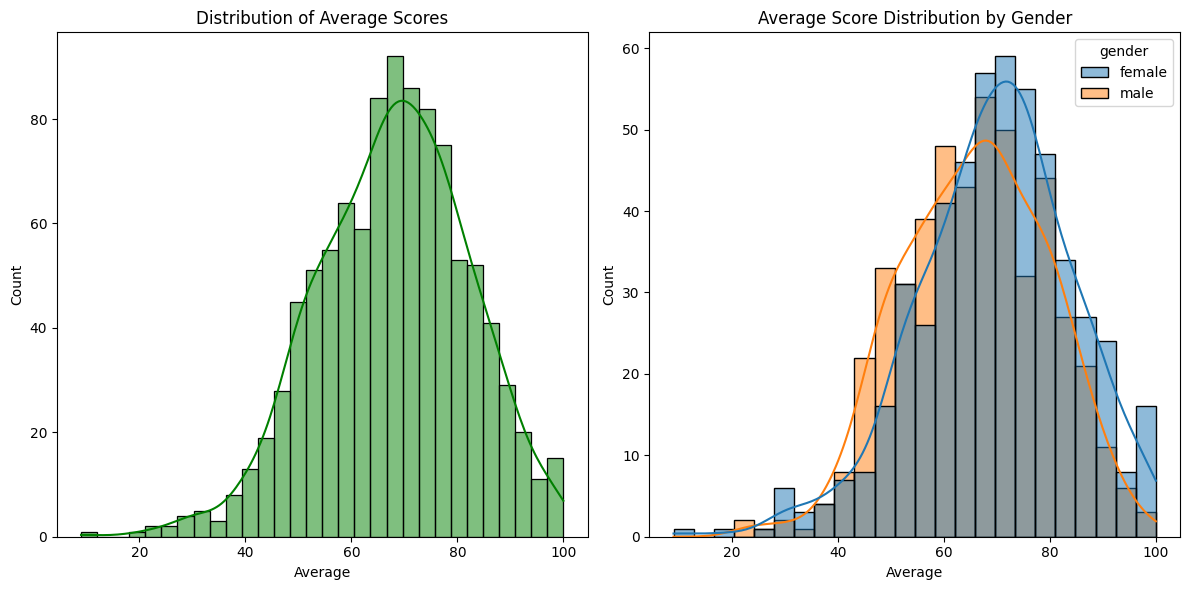

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6)) 

# First plot: Histogram of 'Average'
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Average Scores')

# Second plot: Histogram by gender
sns.histplot(data=df, x='Average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Average Score Distribution by Gender')

# Show the plots
plt.tight_layout()
plt.show()

Insights


Female students tend to perform well than male students


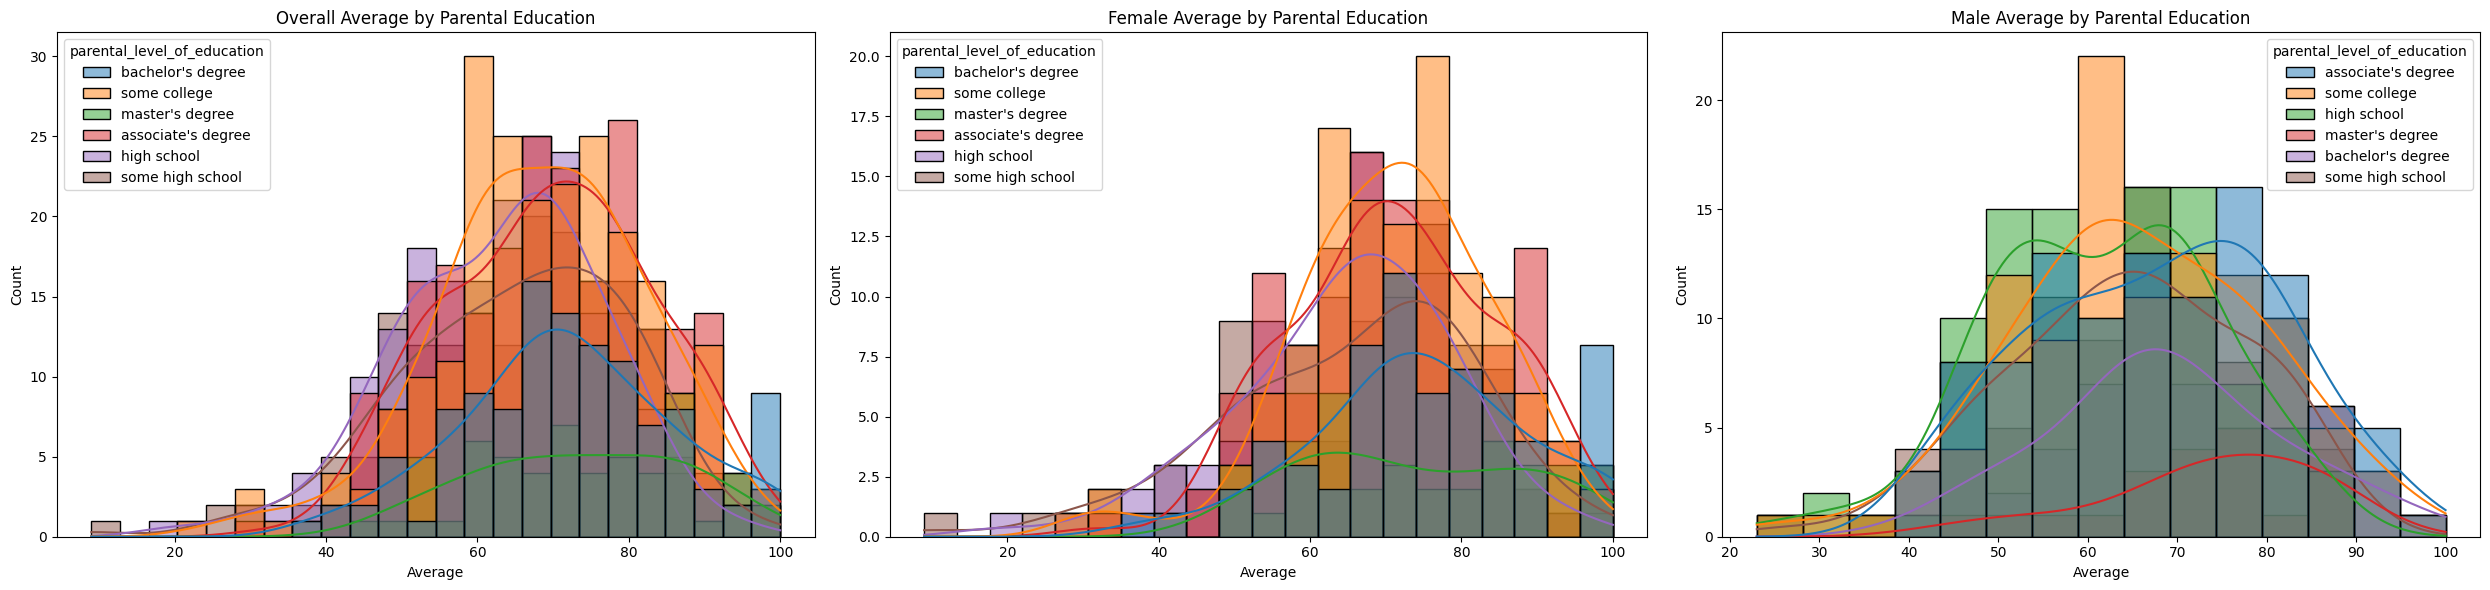

In [78]:
plt.figure(figsize=(25, 6))

# First plot
plt.subplot(131)
sns.histplot(data=df, x='Average', kde=True, hue='parental_level_of_education')
plt.title('Overall Average by Parental Education')

# Second plot (female only)
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='parental_level_of_education')
plt.title('Female Average by Parental Education')

# Third plot (male only)
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='parental_level_of_education')
plt.title('Male Average by Parental Education')

plt.tight_layout()
plt.show()

Insights

Students with parents holding higher education degrees (bachelor's or master's) tend to achieve higher average scores, with the effect most prominent among females. Female students show a stronger correlation between parental education and performance, especially at higher score ranges. In contrast, male students' scores are more evenly distributed across all education levels, indicating a weaker correlation.



In [79]:
df.shape

(1000, 10)

In [80]:
X = df.drop(columns = ['Total_score'],axis = 1)
y = df['Total_score']

In [81]:
df.head(
    
)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [82]:
# differentiate features into categorical and numerical
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns 

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [84]:
num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [85]:
preprocessr = ColumnTransformer([
    ('OneHotEncoder',oh_transformer,cat_features),
    ('StandardScaler',num_transformer,num_features)
])

In [86]:
X = preprocessr.fit_transform(X)

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [88]:
# create and evaluate function to give all metrics after model training

def evaluate_model (true,predict):
    mae = mean_absolute_error(true,predict)
    mse = mean_squared_error(true,predict)
    rms = np.sqrt(mean_squared_error(true,predict))
    r2s = r2_score(true,predict)
    return mae,mse,rms,r2s
models = {
    'LinearRegression':LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor':XGBRegressor()
}
model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mse,model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mse,model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

LinearRegression
Model performance for Training set
- Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Mean Squared Error: 0.8075
- Root Mean Squared Error: 1.0090
- Mean Absolute Error: 1.0181
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Mean Squared Error: 0.8312
- Root Mean Squared Error: 1.0557
- Mean Absolute Error: 1.1146
- R2 Score: 0.9994


Ridge
Model performance for Training set
- Mean Squared Error: 0.0143
- Root Mean Squared Error: 0.0176
- Mean Absolute Error: 0.0003
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Mean Squared Error: 0.0147
- Root Mean Squared Error: 0.0193
- Mean Absolute Error: 0.0004
- R2 Score: